In [1]:
from sklearn.datasets import *
import numpy as np
import mlutils
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

def visualize_tree(tree, feature_names):
    from sklearn.tree import export_graphviz
    with open("/tmp/dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f, impurity=False, class_names=["blue", "red"],
                        feature_names=feature_names, label="none")

    !dot -Tpng /tmp/dt.dot -o /tmp/dt.png
    
hasdot = !which dot
if len(hasdot)==0:
    print "Installing Graphviz for tree visualization"
    !sudo apt-get update
    !sudo apt-get install -y graphviz

Installing Graphviz for tree visualization
Hit:1 http://co.archive.ubuntu.com/ubuntu artful InRelease
Get:2 http://co.archive.ubuntu.com/ubuntu artful-updates InRelease [88.7 kB]
Get:3 http://co.archive.ubuntu.com/ubuntu artful-backports InRelease [74.6 kB] 
Get:4 http://security.ubuntu.com/ubuntu artful-security InRelease [83.2 kB]    
Get:5 http://co.archive.ubuntu.com/ubuntu artful-updates/main i386 Packages [268 kB]
Get:6 http://co.archive.ubuntu.com/ubuntu artful-updates/main amd64 Packages [272 kB]
Get:7 http://co.archive.ubuntu.com/ubuntu artful-updates/main Translation-en [124 kB]
Get:8 http://security.ubuntu.com/ubuntu artful-security/main i386 Packages [174 kB]
Get:9 http://co.archive.ubuntu.com/ubuntu artful-updates/restricted amd64 Packages [2,200 B]
Get:10 http://co.archive.ubuntu.com/ubuntu artful-updates/restricted i386 Packages [2,188 B]
Get:11 http://co.archive.ubuntu.com/ubuntu artful-updates/restricted Translation-en [1,284 B]
Get:12 http://co.archive.ubuntu.com/ubun

Selecting previously unselected package libfontconfig1:amd64.
Preparing to unpack .../02-libfontconfig1_2.11.94-0ubuntu2_amd64.deb ...
Unpacking libfontconfig1:amd64 (2.11.94-0ubuntu2) ...
Selecting previously unselected package fontconfig.
Preparing to unpack .../03-fontconfig_2.11.94-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.11.94-0ubuntu2) ...
Selecting previously unselected package libjpeg-turbo8:amd64.
Preparing to unpack .../04-libjpeg-turbo8_1.5.2-0ubuntu5.17.10.1_amd64.deb ...
Unpacking libjpeg-turbo8:amd64 (1.5.2-0ubuntu5.17.10.1) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../05-libjbig0_2.1-3.1_amd64.deb ...
Unpacking libjbig0:amd64 (2.1-3.1) ...
Selecting previously unselected package fonts-liberation.
Preparing to unpack .../06-fonts-liberation_1%3a1.07.4-2_all.deb ...
Unpacking fonts-liberation (1:1.07.4-2) ...
Selecting previously unselected package libcdt5.
Preparing to unpack .../07-libcdt5_2.38.0-16ubuntu2_amd64.deb ...
Unpack

In [41]:
from sklearn.tree import DecisionTreeClassifier
X,y = make_moons(400, noise=0.1)
Xts,yts = make_moons(100, noise=0.1)

X,y = make_circles(400, noise=0.05)
Xts,yts = make_circles(100, noise=0.05)



In [42]:
X.shape, y.shape

((400, 2), (400,))

In [43]:
np.unique(y)

array([0, 1])

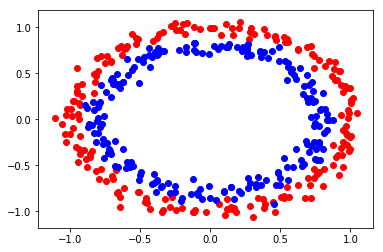

In [44]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue")


In [45]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X,y)
y_preds = dt.predict(X)
dt.score(X,y)

0.69

## Arboles de decision

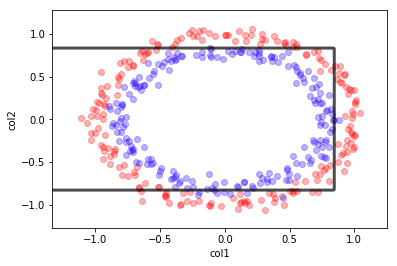

In [46]:
import mlutils
dt = DecisionTreeClassifier(max_depth=3); dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.xlabel("col1"); plt.ylabel("col2");

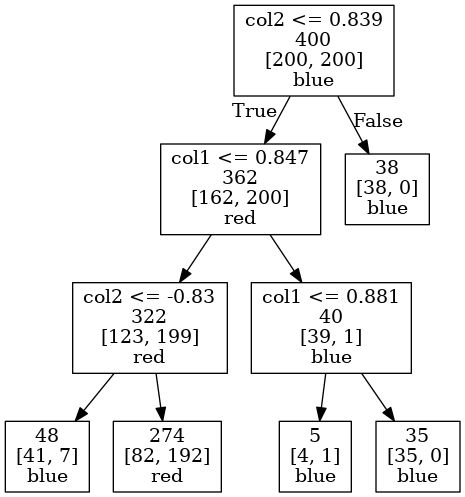

In [47]:
visualize_tree(dt, ["col1", "col2"])
Image("/tmp/dt.png", width=300)

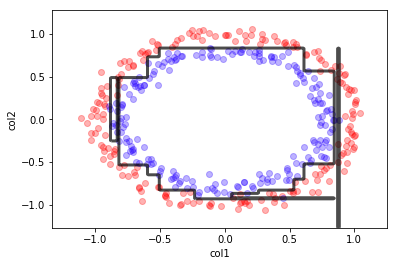

In [48]:
dt = DecisionTreeClassifier(max_depth=10); 
dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

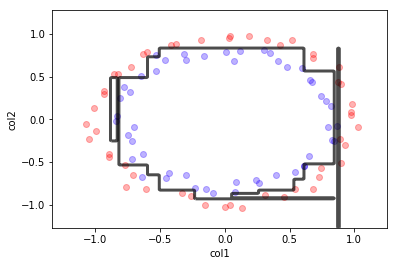

In [49]:
mlutils.plot_2Ddata(Xts, yts, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

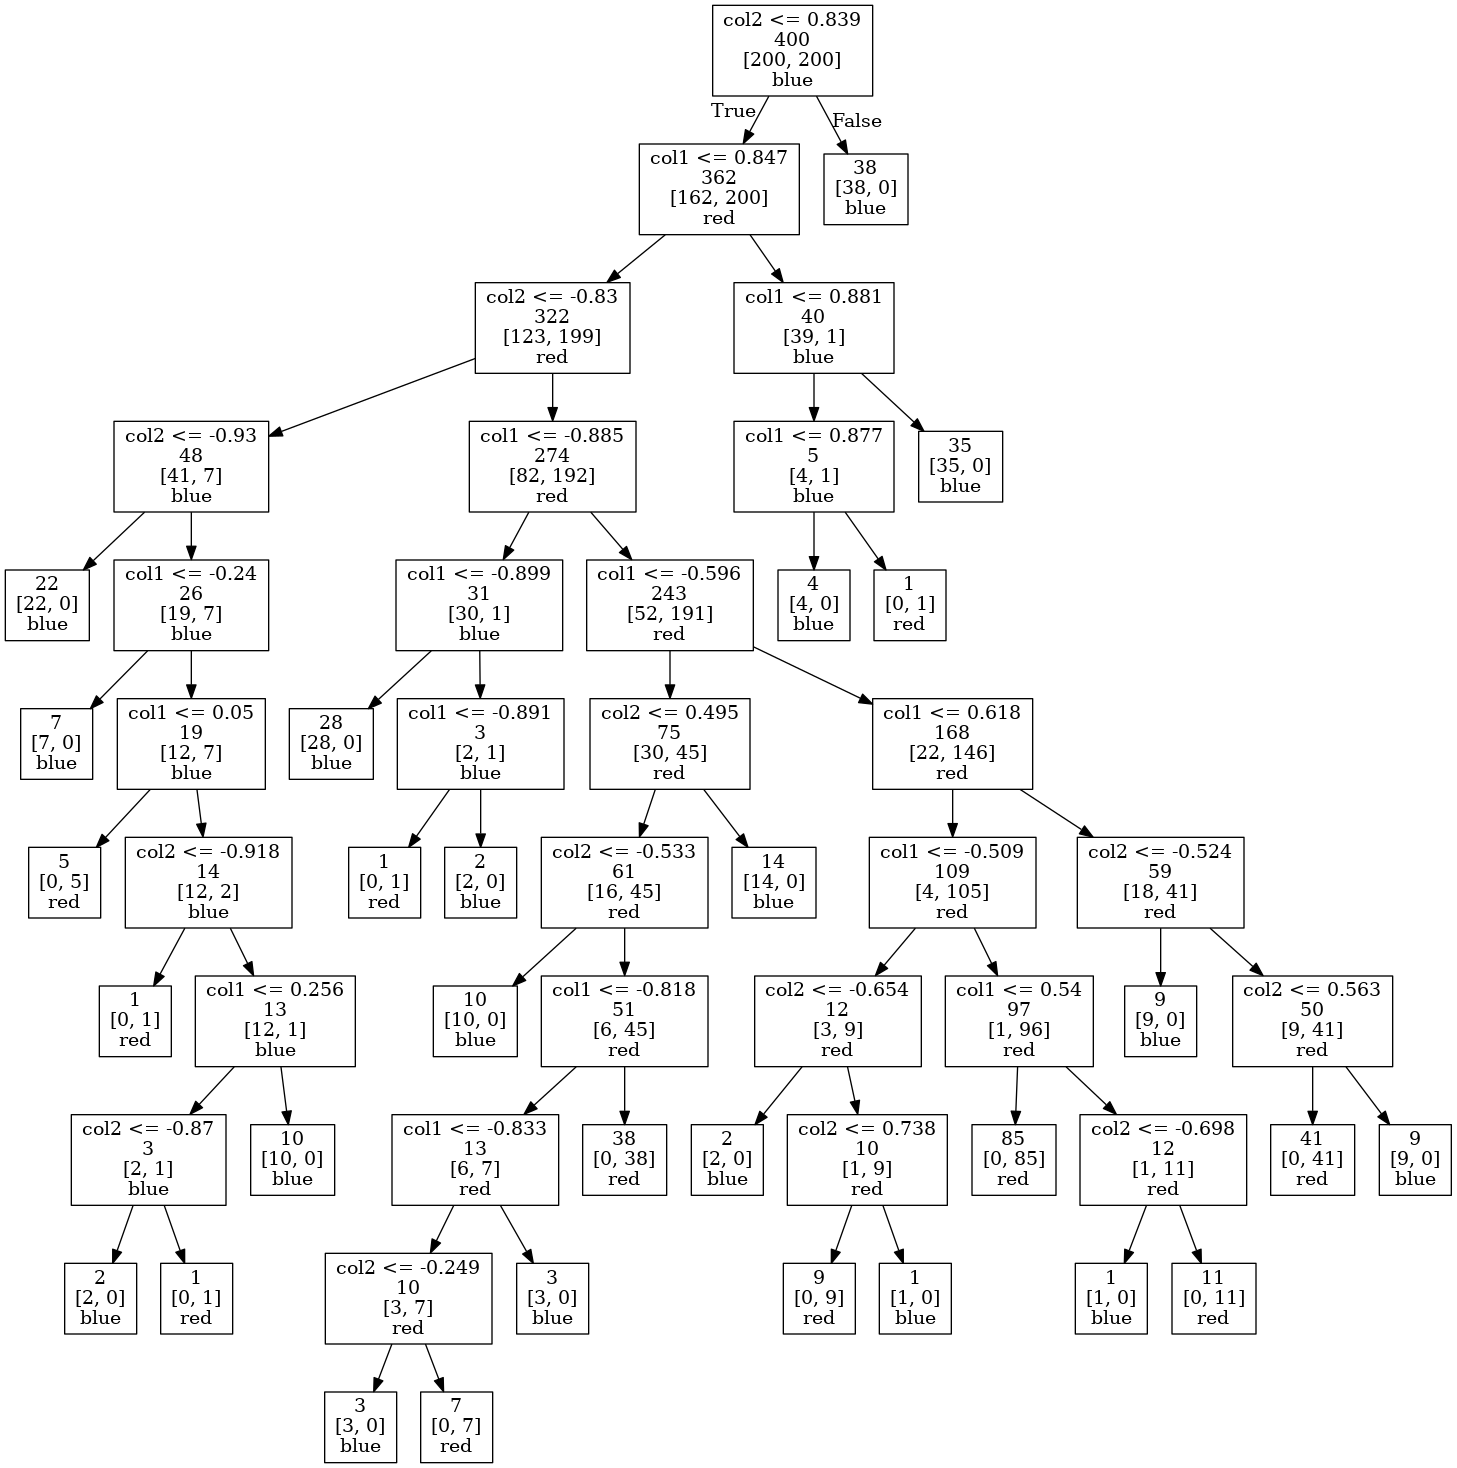

In [50]:
visualize_tree(dt, ["col1", "col2"])
Image("/tmp/dt.png", width=400)

## Naive Bayes

(0.624025, 0.375975)

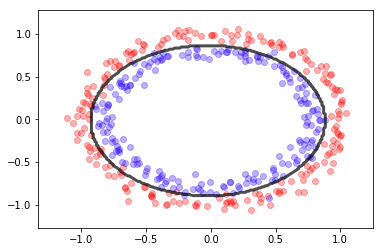

In [51]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(0.67365, 0.32635)

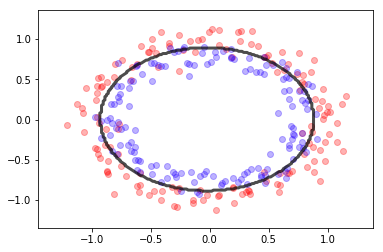

In [52]:
X,y = make_circles(300, noise=.1)
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(0.524675, 0.475325)

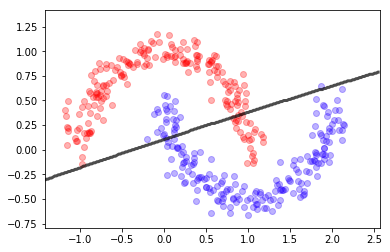

In [53]:
X,y = make_blobs(300, centers=2, cluster_std=2)
X, y = make_moons(400, noise=0.1)
gb = GaussianNB()
gb.fit(X,y)

mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


observa que si alguna de las variables no es independiente el método falla

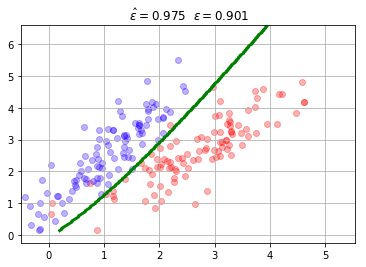

In [67]:
import mlutils
mc = mlutils.Example_Bayes2DClassifier(mean0=[2.5, 2.5], cov0=[[.9, .9], 
                                                               [0.8, 1.1]],
                                        mean1=[1, 2.5], cov1=[[0.5,.8],
                                                             [0.4,0.9]])
X,y = mc.sample(200)
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid();


0.855


(0.590425, 0.409575)

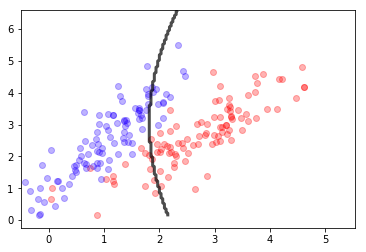

In [68]:
gb.fit(X,y)
print gb.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


## Support vector machines

observa que $\gamma$ representa **cuanto de cercanos han de estar dos puntos para considerarlos similares**

1.0
number of support vectors 5


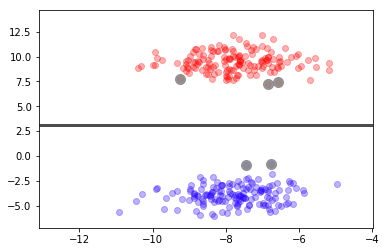

In [103]:
from sklearn.svm import SVC
X,y = make_blobs(300, centers=2, cluster_std=1)
sv = SVC(gamma=1e-2)
sv.fit(X,y)
print sv.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")
print "number of support vectors", len(sv.support_vectors_)

0.84


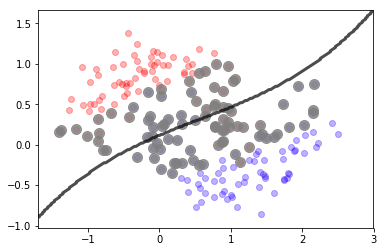

In [86]:
from sklearn.svm import SVC
X,y = make_moons(200, noise=0.2)
sv = SVC(gamma=.1)
sv.fit(X,y)
print sv.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.8, color="gray")

In [87]:
sv.support_vectors_.shape

(88, 2)

0.96


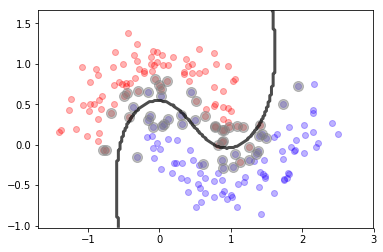

In [88]:
sv = SVC(gamma=1)
sv.fit(X,y)
print sv.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.5, color="gray")

0.76


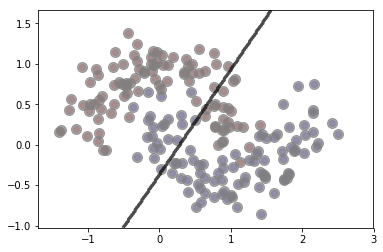

In [89]:
sv = SVC(gamma=1e-4)
sv.fit(X,y)
print sv.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(sv.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], s=100, alpha=.7, color="gray")

## Random forests

0.765


(0.6255, 0.3745)

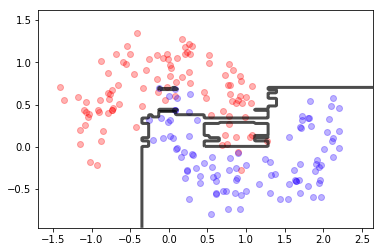

In [76]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=5)
rf.fit(X,y)
print sv.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


0.98


(0.54225, 0.45775)

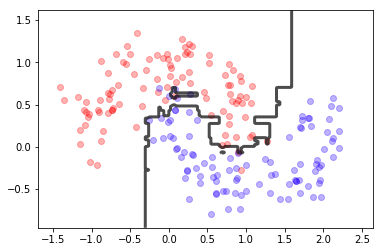

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, n_estimators=15)
rf.fit(X,y)
print rf.score(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
